# Лабораторная работа 2
Визуализация данных

Выполнил: гр. 6132, Габбасов Раиль Ринатович

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

In [2]:
df = pd.read_csv('../data/history-of-rock-spotify.csv').drop(columns='index')
df.head()

name              artist  \
0                       Smells Like Teen Spirit             Nirvana   
1                 Stairway to Heaven - Remaster        Led Zeppelin   
2           Bohemian Rhapsody - Remastered 2011               Queen   
3                     Imagine - Remastered 2010         John Lennon   
4  (I Can't Get No) Satisfaction - Mono Version  The Rolling Stones   

   release_date    length  popularity  danceability  acousticness  \
0          1991  5.032000          74         0.502      0.000025   
1          1971  8.047167          78         0.338      0.580000   
2          1975  5.905333          74         0.392      0.288000   
3          1971  3.131100          77         0.547      0.907000   
4          1965  3.713550          77         0.723      0.038300   

   danceability.1  energy  instrumentalness  key  liveness  loudness  \
0           0.502   0.912          0.000173    1    0.1060    -4.556   
1           0.338   0.340          0.003200    9    0.1160   -12.049   
2           0.392   0.402          0.000000    0    0.2430    -9.961   
3           0.547   0.257          0.183000    0    0.0935   -12.358   
4           0.723   0.863          0.031700    2    0.1280    -7.890   

   speechiness    tempo  time_signature  valence  
0       0.0564  116.761               4    0.720  
1       0.0339   82.433               4    0.197  
2       0.0536  143.883               4    0.228  
3       0.0252   75.752               4    0.169  
4       0.0338  136.302               4    0.931

In [3]:
df.dtypes

name                 object
artist               object
release_date          int64
length              float64
popularity            int64
danceability        float64
acousticness        float64
danceability.1      float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.


In [4]:
ys = df[['danceability', 'energy']].to_numpy()[::5]
ys

array([[0.502, 0.912],
       [0.579, 0.508],
       [0.27 , 0.944],
       ...,
       [0.264, 0.859],
       [0.317, 0.916],
       [0.432, 0.887]])

Text(0.5, 1.0, 'danceability-energy dependence')

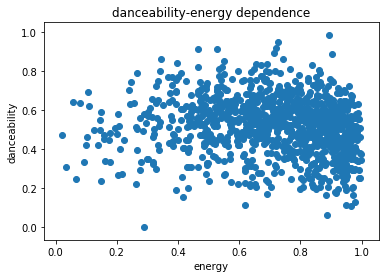

In [5]:
# 1.1
plt.scatter(ys[:, 1], ys[:, 0])
plt.xlabel('energy')
plt.ylabel('danceability')
plt.title('danceability-energy dependence')

Text(0.5, 1.0, 'liveness-energy dependence')

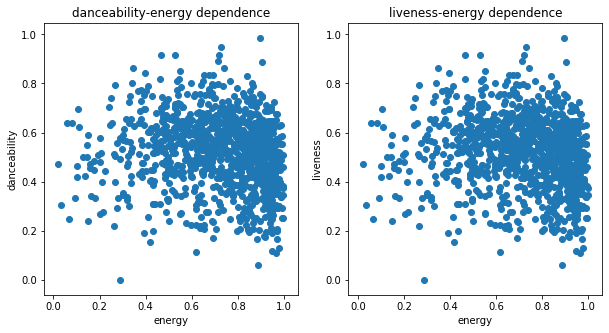

In [6]:
#1.2

ys1 = df[['danceability', 'energy']].to_numpy()[::5]
ys2 = df[['liveness', 'energy']].to_numpy()[::5]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(ys1[:, 1], ys1[:, 0])
ax1.set_xlabel('energy')
ax1.set_ylabel('danceability')
ax1.set_title('danceability-energy dependence')

ax2.scatter(ys1[:, 1], ys1[:, 0])
ax2.set_xlabel('energy')
ax2.set_ylabel('liveness')
ax2.set_title('liveness-energy dependence')

2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

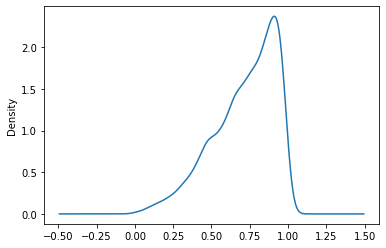

In [7]:
df['energy'].plot(kind='kde')  # series plot

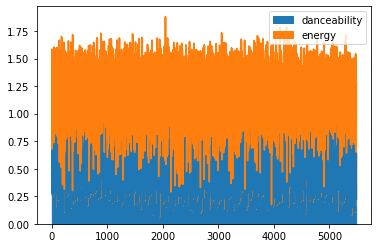

In [8]:
df[['danceability', 'energy']].plot(kind='area')  # dataframe plot

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


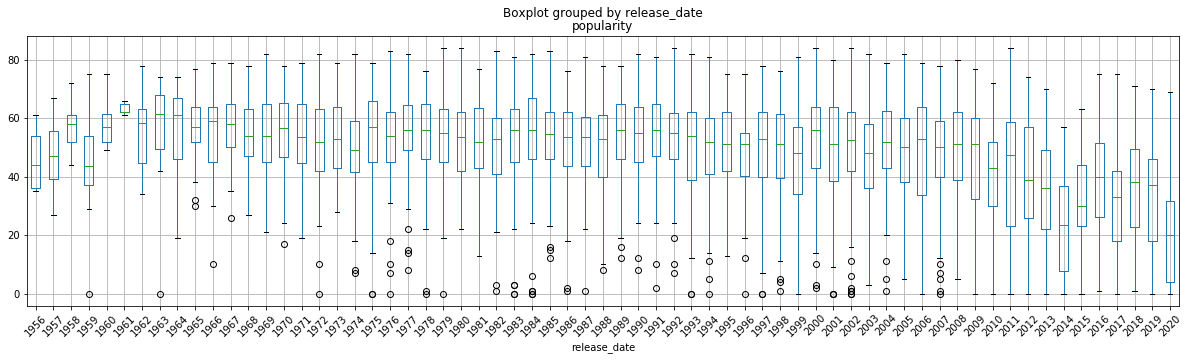

In [9]:
# boxplot
ax = df.boxplot(column='popularity', by='release_date', figsize=(20, 5))
ax.tick_params(axis='x', rotation=45)

3  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)


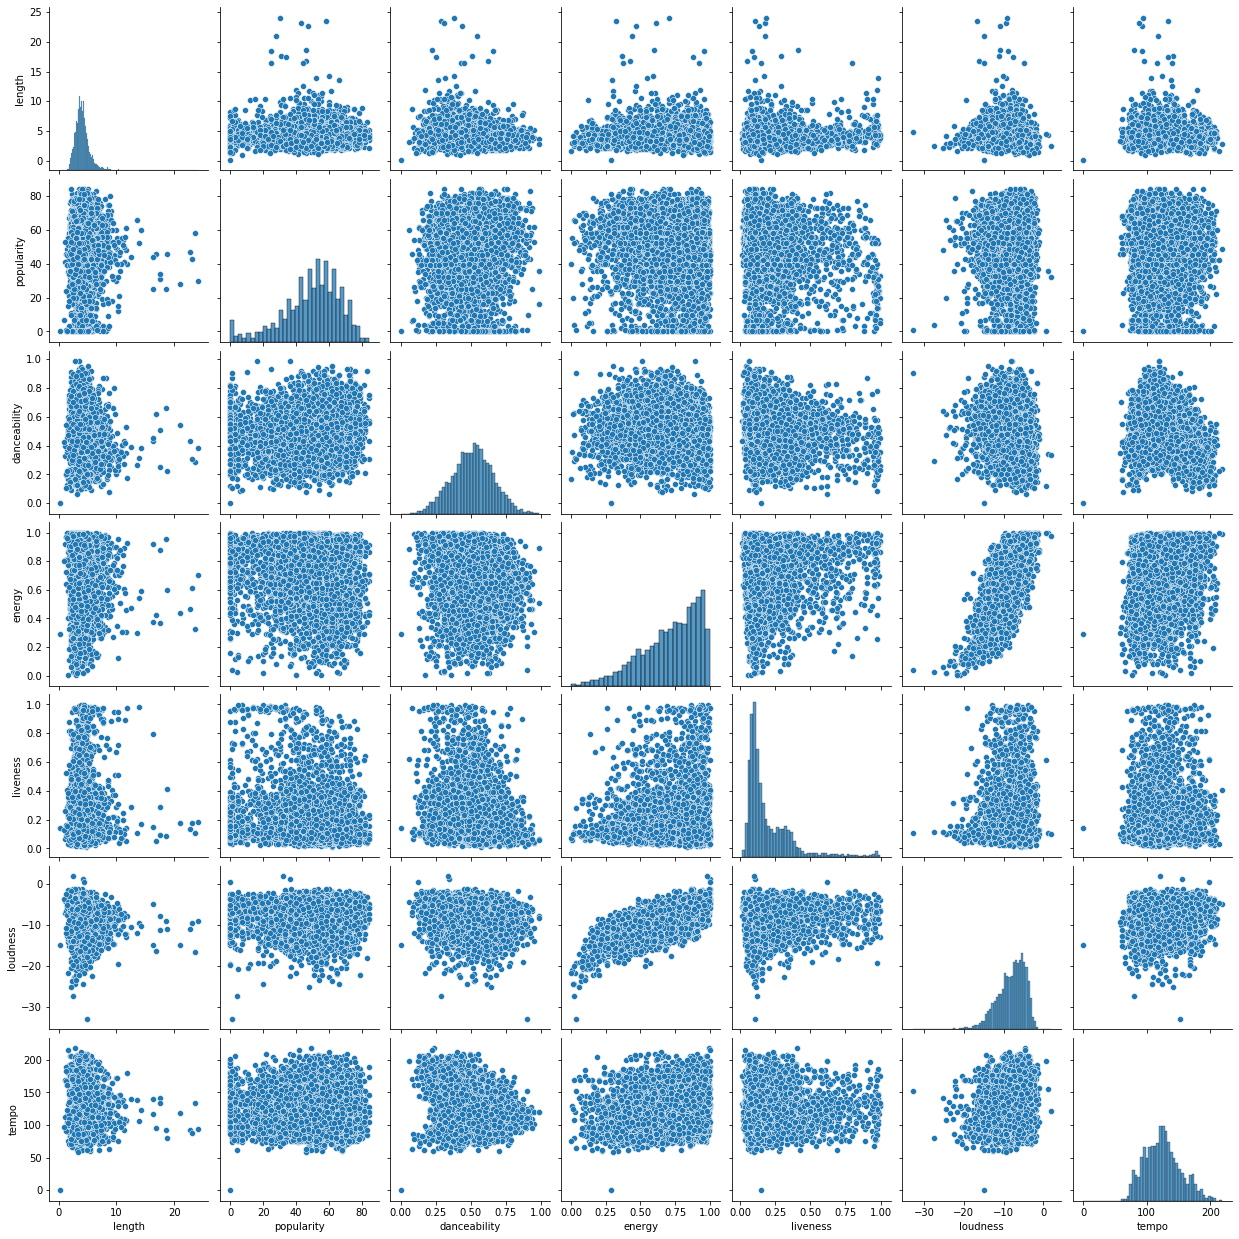

In [10]:
# 3.1
sns.pairplot(df[['length', 'popularity', 'danceability', 'energy', 'liveness', 'loudness', 'tempo']])

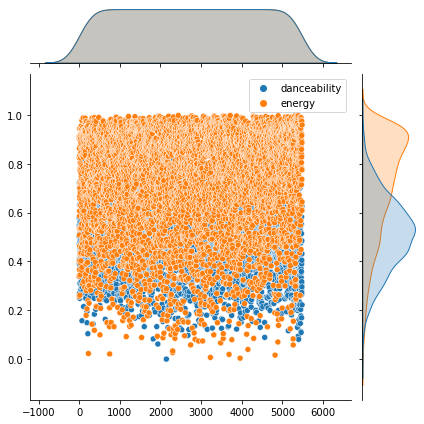

In [11]:
# 3.2
sns.jointplot(data=df[['danceability', 'energy']])

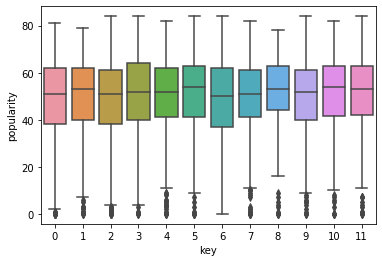

In [12]:
# 3.3
sns.boxplot(x='key', y='popularity', data=df)

In [13]:
real_features = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

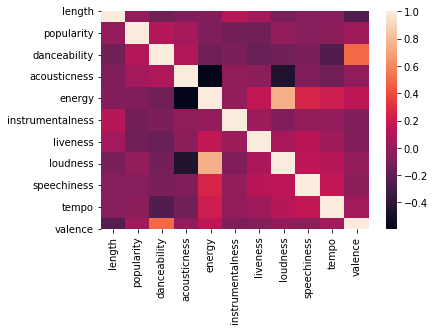

In [14]:
sns.heatmap(df[real_features].corr())

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

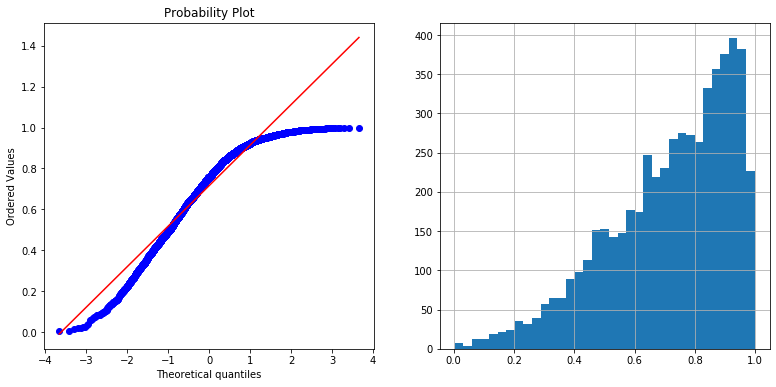

In [15]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['energy'], dist="norm", plot=plt)

plt.subplot(1, 2, 2)
df['energy'].hist(bins = 35)

plt.show()

5 Построить любой график (связанный с вашими данными) с помощью plotly

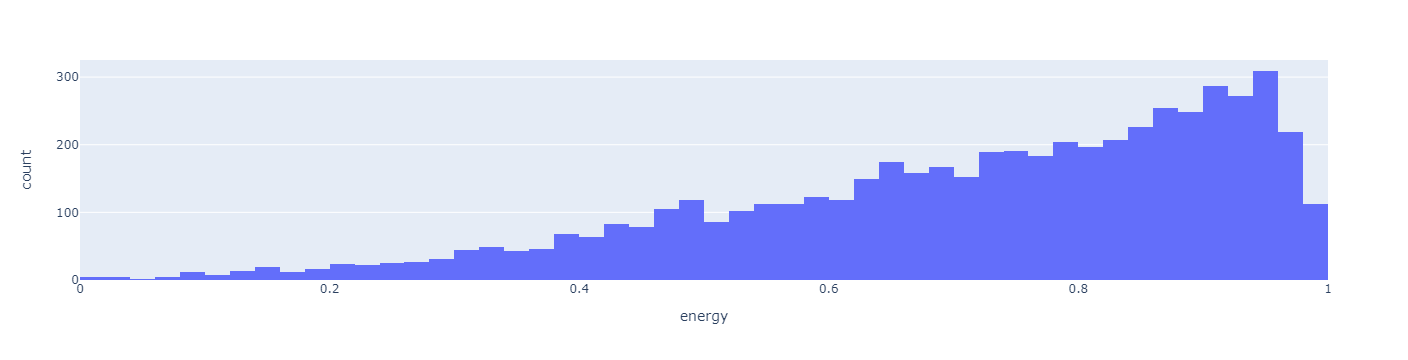

In [16]:
fig = px.histogram(df, x='energy')
fig.show()